## 多项式回归

In [1]:
##构造测试数据集
import numpy as np
import matplotlib.pyplot as plt
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)
plt.scatter(X,y)
plt.show()

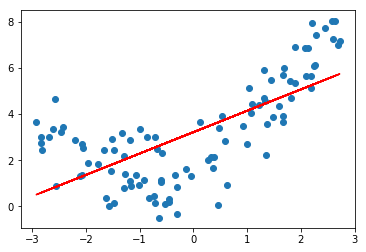

In [2]:
##用线性回归拟合试一下
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
y_predict = lin_reg.predict(X)
#绘制线性回归的拟合结果
plt.scatter(X,y)
plt.plot(X,y_predict,color='r')
plt.show()

#### 添加一个特征

In [3]:
X2 = np.hstack([X,X**2])

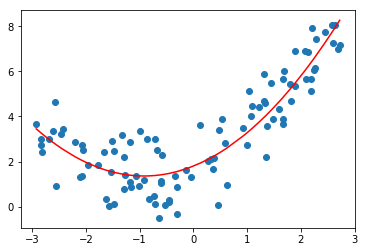

In [4]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X2,y)
y_predict2 = lin_reg2.predict(X2)
##排序依次画线，拼接
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict2[np.argsort(x)],color='r')
plt.show()


In [5]:
lin_reg2.coef_,lin_reg2.intercept_#系数和截距

(array([0.95890742, 0.52096269]), 1.8012636613862982)

### sklearn中的多项式回归

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures as Poly
poly = Poly(degree=2)#添加最多几次幂的特征
poly.fit(X)
X3 = poly.transform(X)#转换为多项式

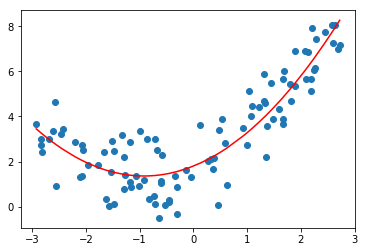

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg3 = LinearRegression()
lin_reg3.fit(X3,y)
y_predict3 = lin_reg3.predict(X3)
##排序依次画线，拼接
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict3[np.argsort(x)],color='r')
plt.show()

In [8]:
lin_reg3.coef_,lin_reg3.intercept_#系数和截距

(array([0.        , 0.95890742, 0.52096269]), 1.8012636613862982)

## PolynomialFeatures

In [9]:
X_ = np.arange(1,11).reshape(-1,2)
X_

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [10]:
poly = Poly(degree=2)
poly.fit(X_)
X2 = poly.transform(X_)
X2##可见，结果为x^0,x1^1,x2^1,x1^2,x1*x2,x2^2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

### Pipeline
在我们构造多项式时，可能会出现本来在同一量度的下的特征，经过构造多项式后出现很大的差距，因此，需要进行数据归一化
#### Pipeline将多步操作合为一步

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pip = Pipeline([
    ('poly',Poly(degree=2)),
    ('std_scaler',StandardScaler()),
    ('lin_reg',LinearRegression())
])

# pip的用法

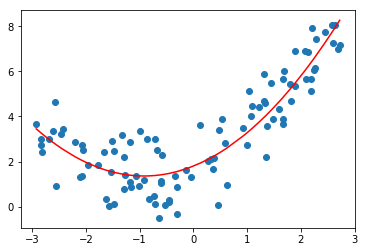

In [12]:
pip.fit(X,y)
y_predict = pip.predict(X)
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict[np.argsort(x)],color='r')
plt.show()

## 总结：
1.多项式回归，我们在进行线性回归时，代码构造是，基于矩阵来写的，因此，我们只要构造好我们的多项式，就可以直接使用我们的回归方法进行fit
2.Pipeline很方便，能够直接把多步操作合并